In [13]:
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS

In [2]:
neighbourhood_size = 11
parameter_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']
ignore = ['229', '285', '323']
train_folds = [1, 2]
train_data = get_normalized_tensor(neighbourhood_size, parameter_names, train_folds, ignore)

X_train = train_data['X']
y_train = train_data['y']
variances_train = train_data['variances']
mean_train = train_data['mean']
std_train = train_data['std']


print(X_train.shape)

(15733, 5)


In [3]:
test_fold = 3

X_test, y_test, variances_test = get_tensors(neighbourhood_size, parameter_names, test_fold, ignore)
X_test = (X_test - mean_train) / std_train

print(X_test.shape)

(7780, 5)


In [4]:
setup = {}

setup["num_features"] = len(parameter_names)
setup["feature_mean"] = mean_train
setup["feature_std"] = std_train
setup["features"] = parameter_names
setup["neighbourhood_size"] = neighbourhood_size

Possible settings for EMOS class:

loss:

    loss_CRPS_sample
    loss_log_likelihood
    loss_Brier_score 
    loss_twCRPS_sample

in case sample is used loss: sample

chaining_functions

    chain_function_indicator 
        includes:
        
         threshold
    chain_function_normal_cdf
        includes: 
        
        chain_function_mean
         chain_function_std

optimizer:

    Adam
    SGD

learning_rate:
    -Positive real valued number

forecast_distribution:

    distr_trunc_normal
    distr_log_normal
    distr_gev(2/3)

    distr_mixture (which contains two of the above distributions)
    distr_mixture_linear

they must contain distribution_1/distribution_2

    


In [5]:
models_crps = {}
setup1 = setup

setup1["loss"] = "loss_CRPS_sample"
setup1["samples"] = 100
setup1["optimizer"] = "Adam"
setup1["learning_rate"] = 0.01
setup1["forecast_distribution"] = "distr_trunc_normal"

trunc_normal_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_log_normal"

log_normal_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev"
setup1["samples"] = 300

gev_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev2"

gev2_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev3"

gev3_crps = EMOS(setup1)


models_crps["trunc_normal_crps"] = trunc_normal_crps
models_crps["log_normal_crps"] = log_normal_crps
models_crps["gev_crps"] = gev_crps
#models_crps["gev2_crps"] = gev2_crps
#models_crps["gev3_crps"] = gev3_crps
print(len(models_crps))

Using default parameters for truncated normal distribution
Using default parameters for log normal distribution
Using default parameters for Generalized Extreme Value distribution
Using default parameters for Generalized Extreme Value distribution 2
Using default parameters for Generalized Extreme Value distribution 3
3


In [7]:
epochs = 600

for model in models_crps:
    models_crps[model].fit(X_train, y_train, variances_train, epochs, printing=False)
    print("Model: ", models_crps[model])

Model:  EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 100)
Forecast distribution: distr_trunc_normal
Parameters:
  a_tn: [0.40210333]
  b_tn: [ 0.9646394  -0.03668451 -0.14465022  0.03199168  0.0230779 ]
  c_tn: [1.5287817]
  d_tn: [1.0367924]
Features: wind_speed, press, kinetic, humid, geopot
Number of features: 5
Neighbourhood size: 11

Optimizer: Adam
Learning rate: 0.009999999776482582

Model:  EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 100)
Forecast distribution: distr_log_normal
Parameters:
  a_ln: [0.8474774]
  b_ln: [ 0.13399567 -0.08112024 -0.0352432  -0.02194415  0.07460423]
  c_ln: [0.12299256]
  d_ln: [-0.00149192]
Features: wind_speed, press, kinetic, humid, geopot
Number of features: 5
Neighbourhood size: 11

Optimizer: Adam
Learning rate: 0.009999999776482582

Model:  EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 300)
Forecast distribution: distr_gev
Parameters:
  a_gev: [0.1610342]
  b_gev: [ 0.9007945   0.

In [10]:
setup1["forecast_distribution"] = "distr_mixture"
setup1["distribution_1"] = "distr_trunc_normal"
setup1["distribution_2"] = "distr_log_normal"

mixture_trunc_log_crps = EMOS(setup1)
mixture_trunc_log_crps.set_parameters(models_crps["trunc_normal_crps"].get_parameters())
mixture_trunc_log_crps.set_parameters(models_crps["log_normal_crps"].get_parameters())

setup1["distribution_2"] = "distr_gev"
mixture_trunc_gev_crps = EMOS(setup1)

mixture_trunc_gev_crps.set_parameters(models_crps["trunc_normal_crps"].get_parameters())
mixture_trunc_gev_crps.set_parameters(models_crps["gev_crps"].get_parameters())

models_crps["mixture_trunc_log_crps"] = mixture_trunc_log_crps
models_crps["mixture_trunc_gev_crps"] = mixture_trunc_gev_crps




Using default parameters for truncated normal distribution
Using default parameters for log normal distribution
Using default weight parameter
Parameter a_tn set to [0.40210333]
Parameter b_tn set to [ 0.9646394  -0.03668451 -0.14465022  0.03199168  0.0230779 ]
Parameter c_tn set to [1.5287817]
Parameter d_tn set to [1.0367924]
Parameter a_ln set to [0.8474774]
Parameter b_ln set to [ 0.13399567 -0.08112024 -0.0352432  -0.02194415  0.07460423]
Parameter c_ln set to [0.12299256]
Parameter d_ln set to [-0.00149192]
Using default parameters for truncated normal distribution
Using default parameters for Generalized Extreme Value distribution
Using default weight parameter
Parameter a_tn set to [0.40210333]
Parameter b_tn set to [ 0.9646394  -0.03668451 -0.14465022  0.03199168  0.0230779 ]
Parameter c_tn set to [1.5287817]
Parameter d_tn set to [1.0367924]
Parameter a_gev set to [0.1610342]
Parameter b_gev set to [ 0.9007945   0.00983677 -0.13710146  0.04406498  0.02801598]
Parameter c_gev 

In [11]:
models_crps["mixture_trunc_gev_crps"].fit(X_train, y_train, variances_train, epochs, printing=False)
print("Model: ", models_crps["mixture_trunc_gev_crps"])

models_crps["mixture_trunc_log_crps"].fit(X_train, y_train, variances_train, epochs, printing=False)
print("Model: ", models_crps["mixture_trunc_log_crps"])

Model:  EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 300)
Forecast distribution: distr_mixture
Distribution 1: distr_trunc_normal
Distribution 2: distr_gev
Mixture weight: [0.76394755]Parameters:
  a_tn: [0.25087368]
  b_tn: [ 0.95143265  0.00817433 -0.20270343 -0.00720054  0.12167601]
  c_tn: [1.9837396]
  d_tn: [1.3368922]
  a_gev: [-0.01083534]
  b_gev: [ 0.88652295  0.03321947 -0.15227248  0.01982927  0.07813238]
  c_gev: [0.95923394]
  d_gev: [ 0.3339737  -0.37537512  0.33866078  0.30389148 -0.70805484]
  e_gev: [0.]
  weight: [0.76394755]
Features: wind_speed, press, kinetic, humid, geopot
Number of features: 5
Neighbourhood size: 11

Optimizer: Adam
Learning rate: 0.009999999776482582

Model:  EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 300)
Forecast distribution: distr_mixture
Distribution 1: distr_trunc_normal
Distribution 2: distr_log_normal
Mixture weight: [0.6850679]Parameters:
  a_tn: [-1.3227928]
  b_tn: [ 1.3540444   0.12647249 

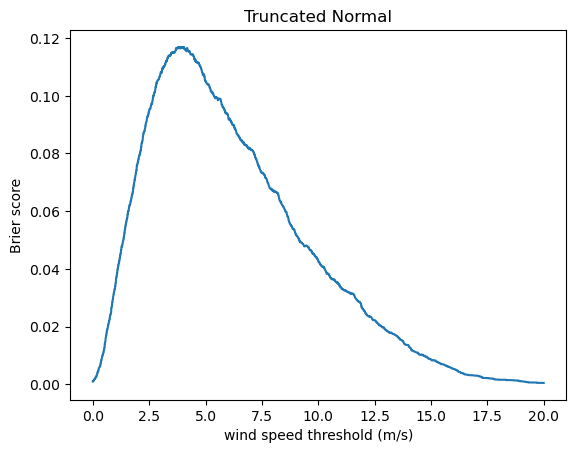

In [12]:
brier_plot(models_crps["trunc_normal_crps"], X_test, y_test, variances_test, "Truncated Normal")

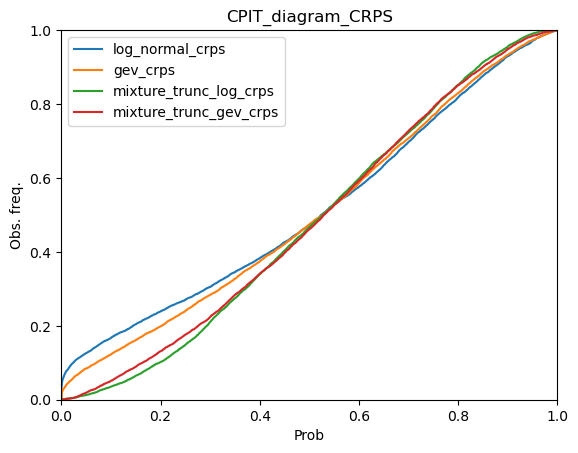

In [16]:
threshold = 0
make_cpit_diagram_emos(models_crps, X_test, y_test, variances_test, "CPIT_diagram_CRPS", threshold)

In [15]:
base_model = models_crps.pop("trunc_normal_crps")
values = np.linspace(0, 20, 200)
brier_skill_plot(base_model, models_crps, X_test, y_test, variances_test, values)

KeyError: 'trunc_normal_crps'